# Exploratory Data Analysis on Supermarket Data

Personal exam of the Data Analysis module in Purwadhika Data Science courses. In this task, the dataset from Purwadhika will be explored to solve an existing problem based on the dataset that we choose. After that, the recommendation for solving the problem will be given.

Dataset: Supermarket

There will be several steps that we will do:
1. Read Data & Check Data
2. Define Goals
3. Data/DataFrame Cleaning
4. Explore the Data
5. Conclusion & Answer Goal
6. Recommendation

So without further ado, let's get started!

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import dateparser
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Read Data & Check Data

In [2]:
df = pd.read_csv('Supermarket.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


### 1.1 Check detail data

In [3]:
data_detail = []

for i in df.columns:
    data_detail.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100),2),
        df[i].nunique()
    ])

pd.DataFrame(data_detail, columns=[
    'Data Features(Col)',
    'Data Types',
    'Null Total',
    'Null Percentage %',
    'Number of Uniqueness'
])

,Data Features(Col),Data Types,Null Total,Null Percentage %,Number of Uniqueness
0,Invoice ID,object,0,0.0,1000
1,Branch,object,0,0.0,3
2,City,object,0,0.0,3
3,Customer type,object,0,0.0,2
4,Gender,object,0,0.0,2
5,Product line,object,0,0.0,6
6,Unit price,float64,0,0.0,943
7,Quantity,int64,0,0.0,10
8,Tax 5%,float64,0,0.0,990
9,Total,float64,0,0.0,990


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.220360e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


#### *Exploration Result*
So we've import all libraries and the dataset.
The dataset itself is about all transaction in supermarket. 
From the dataset, we see that there are 16 columns and this data is a sample of 3 months transactions.

And then, we see the result of detail inspection of dataframe
- All the columns/features name still in Title style, perhaps we'll change it to python style.
- There's NO null percentage.
- We don't need city column, because in this scenario we assume that this is a dataset from a supermarket that located in Indonesia
- Date column datatypes still object, we'll change it later and extract it into piece (day, month, year)
- Price writing format is still in USD form. We will convert it into rupiah
- gross margin percentage column has only a data and it's all duplicate, so we'll drop that column later
- gross income is a simillar data with tax columns, we'll drop it later

## 2. Define Goals

From the previous exploration on Read&Check data, we can set the goals for the company:
1. **Spell out meaningful insights from our exploration**
2. **Find out which branch has low sales and then provide recommendations to increase sales at that branch.**

## 3. Data/DataFrame Cleaning

### 3.1 Rename columns

In [5]:
print('Total Rows before editing columns:', df.shape[0])

df = df.rename(columns=str.lower)
df.columns = [x.replace(' ', '_') for x in df.columns]

print('Total Rows after editing columns:', df.shape[0])

Total Rows before editing columns: 1000
Total Rows after editing columns: 1000


In [6]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### 3.2 Drop columns
We'll drop city, gross_margin_percentafe and gross_income columns.

In [7]:
# check each value in tax_5% and gross_income column
if df['tax_5%'].all() == df['gross_income'].all():
    print(True)
else:
    print(False)

True


In [8]:
print('Num of columns before dropped:', df.shape[1])
df.drop(['city','gross_income','gross_margin_percentage'], axis=1, inplace=True)
print('Num of columns after dropped:', df.shape[1])

Num of columns before dropped: 17
Num of columns after dropped: 14


In [9]:
df.columns

Index(['invoice_id', 'branch', 'customer_type', 'gender', 'product_line',
       'unit_price', 'quantity', 'tax_5%', 'total', 'date', 'time', 'payment',
       'cogs', 'rating'],
      dtype='object')

### 3.3 Convert currency type data from USD to Rp
today 1$ = Rp. 14,449.90

value of unit_price, tax_5, total, cogs before converted:

In [10]:
df[['unit_price', 'tax_5%', 'total', 'cogs']]

,unit_price,tax_5%,total,cogs
0,74.69,26.1415,548.9715,522.83
1,15.28,3.8200,80.2200,76.40
2,46.33,16.2155,340.5255,324.31
3,58.22,23.2880,489.0480,465.76
4,86.31,30.2085,634.3785,604.17
...,...,...,...,...
995,40.35,2.0175,42.3675,40.35
996,97.38,48.6900,1022.4900,973.80
997,31.84,1.5920,33.4320,31.84
998,65.82,3.2910,69.1110,65.82


In [11]:
df['unit_price'] = df['unit_price'].apply(lambda x: round(x*14449.90))
df['tax_5%'] = df['tax_5%'].apply(lambda x: round(x*14449.90))
df['total'] = df['total'].apply(lambda x: round(x*14449.90))
df['cogs'] = df['cogs'].apply(lambda x: round(x*14449.90))

In [12]:
df[['unit_price', 'tax_5%', 'total', 'cogs']]

,unit_price,tax_5%,total,cogs
0,1079263,377742,7932583,7554841
1,220794,55199,1159171,1103972
2,669464,234312,4920559,4686247
3,841273,336509,7066695,6730185
4,1247171,436510,9166706,8730196
...,...,...,...,...
995,583053,29153,612206,583053
996,1407131,703566,14774878,14071313
997,460085,23004,483089,460085
998,951092,47555,998647,951092


### 3.4 Extract date column
- First thing first, we need to change the data type of our date column into datetime with format M-D-Y.
- After that, we extract the date as needed (e.g. day, week, day of week, year)

In [13]:
df['date'] = df['date'].apply(dateparser.parse)
df[['date']].head()

,date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08


Now, our date format is Y-M-D.
Next, let's extract the date into piece.

In [14]:
date_dt = df['date'].dt
df['day'] = date_dt.dayofweek
df['date_day'] = date_dt.day
df['month'] = date_dt.month
df['month_name'] = date_dt.month_name()
df['year_month'] = date_dt.to_period('M')
df['year'] = date_dt.year

In [15]:
df.head()

,invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,rating,day,date_day,month,month_name,year_month,year
0,750-67-8428,A,Member,Female,Health and beauty,1079263,7,377742,7932583,2019-01-05,13:08,Ewallet,7554841,9.1,5,5,1,January,2019-01,2019
1,226-31-3081,C,Normal,Female,Electronic accessories,220794,5,55199,1159171,2019-03-08,10:29,Cash,1103972,9.6,4,8,3,March,2019-03,2019
2,631-41-3108,A,Normal,Male,Home and lifestyle,669464,7,234312,4920559,2019-03-03,13:23,Credit card,4686247,7.4,6,3,3,March,2019-03,2019
3,123-19-1176,A,Member,Male,Health and beauty,841273,8,336509,7066695,2019-01-27,20:33,Ewallet,6730185,8.4,6,27,1,January,2019-01,2019
4,373-73-7910,A,Normal,Male,Sports and travel,1247171,7,436510,9166706,2019-02-08,10:37,Ewallet,8730196,5.3,4,8,2,February,2019-02,2019


#### *Data Cleaning Result*
Okay we've come this far but we haven't see the finish line. We've prepared our dataframe from the main df but the columns are not ordered yet; so after this, we save our new df to csv as a clean one and then we move into Exploration step!

In [17]:
# save df to csv
df.to_csv('supermarket_clean_v1.csv')
print('New csv has created')

New csv has created


## 4. Explore the Data

So we've come to the core step of this task. Exploring the data. What will we explore? Well, I guess there are several simple-basic insight that we have to get from the exploration, such as:
- Check the outliers of quantity column
- Calculate the supermarket net profit margin from all branches
- Calculate the supermarket net profit margin in each branches
- Find the branch with lowest sale
- etc

Just do it first and we'll see what come next.

### 4.1 Check the outliers of quantity column
why do we choose the quantity column? because the value of this column is a continuous number, so if there is an odd value it will affect the final total value.

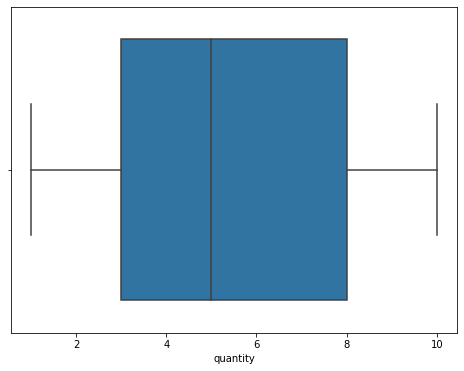

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(df['quantity'])
plt.show()

good, there's no an outlier value. let's check unit_price and total outlier

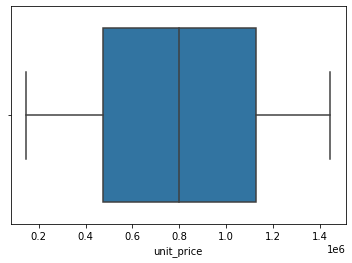

In [23]:
sns.boxplot(df['unit_price'])
plt.show()

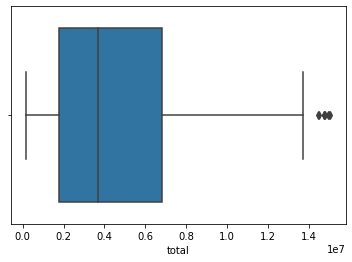

In [24]:
sns.boxplot(df['total'])
plt.show()

So, there is no an outlier value in unit_price but total has. We'll see the data which over the upperfence value

In [26]:
q1 = df.total.describe()['25%']
q3 = df.total.describe()['75%']
iqr = q3 - q1
upperfence = round(q3 + (1.5 * iqr))
print('total upperlance value:', upperfence)

total upperlance value: 14330573


In [29]:
df[df['total'] > upperfence]

,invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,rating,day,date_day,month,month_name,year_month,year
166,234-65-2137,C,Normal,Male,Home and lifestyle,1381121,10,690561,14501775,2019-01-16,13:32,Cash,13811214,4.8,2,16,1,January,2019-01,2019
167,687-47-8271,A,Normal,Male,Fashion accessories,1430251,10,715126,15017637,2019-02-08,16:20,Credit card,14302511,8.7,4,8,2,February,2019-02,2019
350,860-79-0874,C,Member,Female,Fashion accessories,1434875,10,717438,15066188,2019-02-15,14:53,Credit card,14348751,6.6,4,15,2,February,2019-02,2019
357,554-42-2417,C,Normal,Female,Sports and travel,1379098,10,689549,14480534,2019-01-09,13:45,Cash,13790985,5.2,2,9,1,January,2019-01,2019
422,271-88-8734,C,Member,Female,Fashion accessories,1404675,10,702337,14749085,2019-02-08,13:00,Credit card,14046748,8.7,4,8,2,February,2019-02,2019
557,283-26-5248,C,Member,Female,Food and beverages,1423604,10,711802,14947844,2019-01-30,20:23,Ewallet,14236041,4.5,2,30,1,January,2019-01,2019
699,751-41-9720,C,Normal,Male,Home and lifestyle,1408865,10,704433,14793085,2019-01-12,16:18,Ewallet,14088652,8.0,5,12,1,January,2019-01,2019
792,744-16-7898,B,Normal,Female,Home and lifestyle,1406987,10,703493,14773361,2019-01-15,13:48,Credit card,14069868,4.9,1,15,1,January,2019-01,2019
996,303-96-2227,B,Normal,Female,Home and lifestyle,1407131,10,703566,14774878,2019-03-02,17:16,Ewallet,14071313,4.4,5,2,3,March,2019-03,2019


after being seen, there are only 9 data that match to the outliers category. but, since this is a transaction data, we want a full report from each transaction from January to March and we don't see any odd values in the quantity and unit_prices columns, so we just leave the values in the outliers category.

### 4.2 Calculate the supermarket net profit margin from all branches

from https://www.jojonomic.com/blog/profit/ we see that:

Pertama, ini dia  caranya menghitung net profit yang harus kamu ketahui:

Net Profit = R – HPP – E – I – T

R = Revenue atau omzet penjualan

HPP/COGS =  Harga Pokok Penjualan

E = Biaya operasional dan biaya lainnya

I = Interest atau bunga yang perlu dibayarkan di periode operasi

T =  Taxes atau pajak yang perlu dibayarkan di periode operasi

Sebenarnya sangat sederhana, revenue adalah omzet, artinya adalah uang yang didapat dari penjualan barang yang kamu jual. Laba adalah uang sisa yang kamu miliki setelah kamu menguranginya dengan modal yang kamu butuhkan.

So to calculate the net profit margin from January to March, we need to identify our:
1. Revenue
2. Sum of COGS

nb: we assume the amount of Biaya Operasional is 30.000.000 and Interest has incleded in tax_5%

In [58]:
revenue = df['total'].sum()
sum_cogs = df['cogs'].sum()
opperational = 30000000
net_profit = revenue - sum_cogs - opperational
net_profit_percent = round((net_profit / df['total'].sum())*100, 2)
print('Our net profit from Jan - Mar: Rp.{}'.format(net_profit))
print('or in percentage:', net_profit_percent,'%')

Our net profit from Jan - Mar: Rp.192230350
or in percentage: 4.12 %


### 4.3 Calculate the supermarket net profit margin from each branches
First, we need to separate the df into each branches

In [59]:
df['branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [60]:
df_a = df[df['branch'] == 'A']
df_b = df[df['branch'] == 'A']
df_c = df[df['branch'] == 'C']

In [67]:
df_num_trans_each = df.groupby('branch')['invoice_id'].nunique().reset_index(name='count').sort_values('branch')
df_num_trans_each

,branch,count
0,A,340
1,B,332
2,C,328


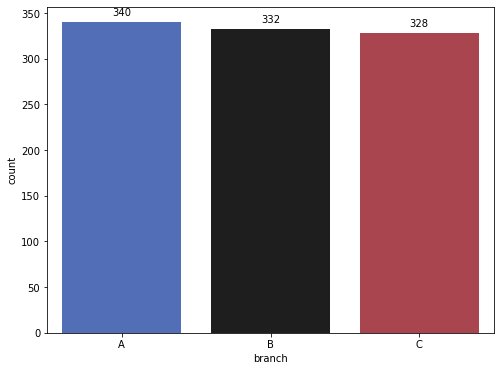

In [68]:
plt.figure(figsize=(8,6))
graph = sns.barplot(x='branch', y='count', data=df_num_trans_each, palette='icefire')
    
for i in graph.patches:
    graph.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()), 
                   ha='center', va='center', xytext=(0,10), textcoords = 'offset points')

    
# plt.xticks(rotation=90)
plt.show()

From the barplot above, we can see that branch A is the brach with the most transactions. Branch C is the lowest. However, the number of their transactions is not much different.

Next we see the comparison of net profit from each branches and we assume the opperational cost to each brances is Rp. 10.000.000

In [71]:
#create the func to make it easier
def net_profit(df_total, df_cogs):
    revenue = df_total.sum()
    sum_cogs = df_cogs.sum()
    opperational = 10000000
    net_profit = revenue - sum_cogs - opperational
    return net_profit
#     net_profit_percent = round((net_profit / df_total.sum())*100, 2)
#     print('Our net profit from Jan - Mar: Rp.{}'.format(net_profit))
#     print('or in percentage:', net_profit_percent,'%')

In [74]:
profit_a = net_profit(df_a['total'], df_a['cogs'])
profit_b = net_profit(df_b['total'], df_b['cogs'])
profit_c = net_profit(df_c['total'], df_c['cogs'])

df_branch_profit = pd.DataFrame({
    'x' : ['A', 'B', 'C'],
    'y' : [profit_a, profit_b, profit_c]
})
df_branch_profit

,x,y
0,A,63075483
1,B,63075483
2,C,66081273


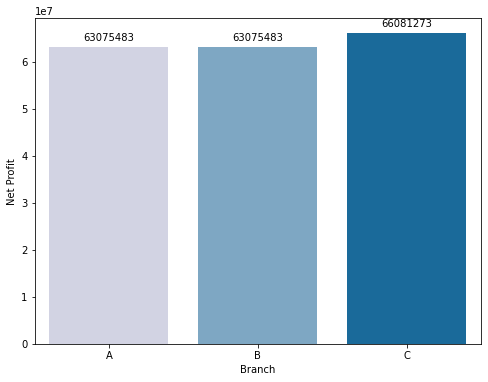

In [78]:
plt.figure(figsize=(8,6))
graph = sns.barplot(x='x', y='y', data=df_branch_profit, palette='PuBu')
    
for i in graph.patches:
    graph.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()), 
                   ha='center', va='center', xytext=(0,10), textcoords = 'offset points')

    
# plt.xticks(rotation=90)
plt.xlabel("Branch")
plt.ylabel("Net Profit")
plt.show()

Okay, now we got some interesting insight. From the net profit exploration above we can see that:
1. Branch A has the highest number of transaction, Branch C is the lowest.
2. Branch C has the highest net profit, Branch A and B is even but lower than C.

So we can conclude that, eventhough Branch C has the lowest number of transactions, but it gave the highest amount of net profit.

Okay from the exploration result above, we need to choose what branch that we'll boost either from number of transaction or net profit.

And We will choose to focus on **Branch B**, since this Branch neither the highest number of transactions nor the highest of having net profit.


### 4.4 Explore the characteristic of transactions in Branch B
Okay we need to identify:
1. Comparing transactions for each day from Mon-Sun
2. What gender do the most transactions in this branch
3. Count the num of payment method that each gender use
4. Look on rating
5. look on product_line

In [79]:
df_b

,invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,rating,day,date_day,month,month_name,year_month,year
0,750-67-8428,A,Member,Female,Health and beauty,1079263,7,377742,7932583,2019-01-05,13:08,Ewallet,7554841,9.1,5,5,1,January,2019-01,2019
2,631-41-3108,A,Normal,Male,Home and lifestyle,669464,7,234312,4920559,2019-03-03,13:23,Credit card,4686247,7.4,6,3,3,March,2019-03,2019
3,123-19-1176,A,Member,Male,Health and beauty,841273,8,336509,7066695,2019-01-27,20:33,Ewallet,6730185,8.4,6,27,1,January,2019-01,2019
4,373-73-7910,A,Normal,Male,Sports and travel,1247171,7,436510,9166706,2019-02-08,10:37,Ewallet,8730196,5.3,4,8,2,February,2019-02,2019
6,355-53-5943,A,Member,Female,Electronic accessories,994731,6,298419,6266806,2019-02-25,14:36,Ewallet,5968387,5.8,0,25,2,February,2019-02,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Normal,Female,Food and beverages,817286,5,204322,4290753,2019-03-22,19:06,Credit card,4086432,4.5,4,22,3,March,2019-03,2019
992,745-74-0715,A,Normal,Male,Electronic accessories,838528,2,83853,1760908,2019-03-10,20:46,Ewallet,1677055,8.8,6,10,3,March,2019-03,2019
997,727-02-1313,A,Member,Male,Food and beverages,460085,1,23004,483089,2019-02-09,13:22,Cash,460085,7.7,5,9,2,February,2019-02,2019
998,347-56-2442,A,Normal,Male,Home and lifestyle,951092,1,47555,998647,2019-02-22,15:33,Cash,951092,4.1,4,22,2,February,2019-02,2019


#### 4.4.1 Comparing transactions for each day from Mon-Sun

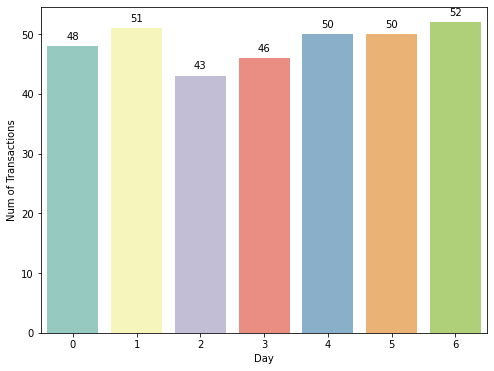

In [86]:
df_trans_day = df_b.groupby('day')['invoice_id'].count().reset_index(name='count')

plt.figure(figsize=(8,6))
graph = sns.barplot(x='day', y='count', data=df_trans_day, palette='Set3')
    
for i in graph.patches:
    graph.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()), 
                   ha='center', va='center', xytext=(0,10), textcoords = 'offset points')

    
# plt.xticks(rotation=90)
plt.xlabel("Day")
plt.ylabel("Num of Transactions")
plt.show()

From the bar result above, we see that Sunday becomes the most num of transactions 

#### 4.4.2 What gender do the most transactions in this branch

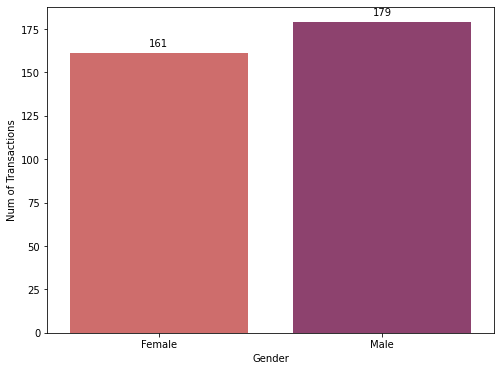

In [89]:
df_trans_day = df_b.groupby('gender')['invoice_id'].count().reset_index(name='count')

plt.figure(figsize=(8,6))
graph = sns.barplot(x='gender', y='count', data=df_trans_day, palette='flare')
    
for i in graph.patches:
    graph.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()), 
                   ha='center', va='center', xytext=(0,10), textcoords = 'offset points')

    
# plt.xticks(rotation=90)
plt.xlabel("Gender")
plt.ylabel("Num of Transactions")
plt.show()

From the bar result above, we can see that Male become the gender that most do transactions in Branch B.
But, we see that Sunday become the highest num of transaction in Branch B. Let see who shop there mostly.

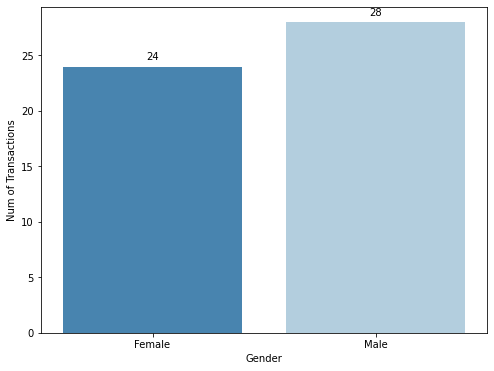

In [95]:
df_trans_day = df_b[df_b['day'] == 6].groupby('gender')['invoice_id'].count().reset_index(name='count')

plt.figure(figsize=(8,6))
graph = sns.barplot(x='gender', y='count', data=df_trans_day, palette='Blues_r')
    
for i in graph.patches:
    graph.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()), 
                   ha='center', va='center', xytext=(0,10), textcoords = 'offset points')

    
# plt.xticks(rotation=90)
plt.xlabel("Gender")
plt.ylabel("Num of Transactions")
plt.show()

So, from the exploration about gender in Branch B we see that, the most shopping in Branch B and moreover in Sunday is Male

#### 4.4.3 Count the num of payment method that each gender use

In [97]:
pd.crosstab(index=df_b['gender'], columns=df_b['payment'])

payment,Cash,Credit card,Ewallet
gender,,,
Female,59,47,55
Male,51,57,71


In [98]:
pd.crosstab(index=[df_b['gender'],df_b['payment']], columns=df['day'])

day                  0   1   2   3   4   5   6
gender payment                                
Female Cash         11  12   5   6   7   8  10
       Credit card   6   8   4   9   8   6   6
       Ewallet      12   8   7   6   5   9   8
Male   Cash         10   3   7   9   9   7   6
       Credit card   6   9  10   5  10   7  10
       Ewallet       3  11  10  11  11  13  12

From the exploration about payment above, we can see that:
- Male mostly do the payment using EWallet (71 Times) and Female use Cash (59 Times)
- In Sunday, Male mostly do the paymet using Ewallet, while Female use Cash

#### 4.4.4 Look on rating

In [104]:
df_b['rating'].unique()

array([ 9.1,  7.4,  8.4,  5.3,  5.8,  7.2,  7.1,  8.2,  5.7,  4.6,  6.9,
        8.6,  9.9,  6. ,  8.5,  7.7,  5.1,  7. ,  4.7,  6.6,  5.4,  6.4,
        4.3,  9.4,  7.3,  9.3,  5.2,  4.5,  9. ,  8.3,  8.8,  9.8,  9.2,
        8. ,  4.9,  8.7,  6.5,  5.5,  9.6,  4.4,  6.7,  6.1,  7.9,  5.9,
        6.2,  4.1,  5.6,  4.2,  6.8,  8.9,  9.7,  7.8,  5. ,  7.6,  7.5,
       10. ,  4.8,  6.3,  9.5,  4. ,  8.1])

In [110]:
df_rating_b = df_b.groupby('gender')['rating'].mean().reset_index(name='mean')
# plt.figure(figsize=(8,6))
# plt.bar(df['gender'], df['mean'],
#        color=['r', 'g'],
#        edgecolor='k',
#        linewidth=2)
# plt.show()
df_rating_b

,gender,mean
0,Female,6.839130
1,Male,7.196089


We can see that the average of rating that Male gave is 7.2, while Female gave 6.8

#### 4.4.4 Look on product_line

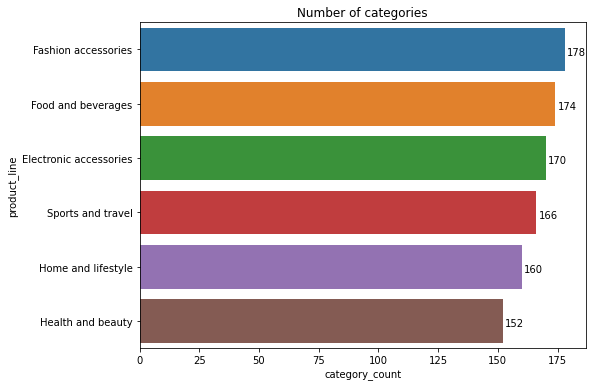

In [119]:
count_category = df.groupby('product_line')['invoice_id'].count().reset_index(name='category_count').sort_values('category_count', ascending=False)
plt.figure(figsize=(8,6))
graph = sns.barplot(x='category_count', y='product_line', data=count_category)
for p in graph.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+ 0.55*p.get_height(),'{:1.0f}'.format(width), ha='center', va='center')
    
# plt.xticks(rotation=90)
plt.title('Number of categories')
plt.show()

In [121]:
pd.crosstab(index=df_b['gender'], columns=df['product_line'])

product_line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
gender,,,,,,
Female,28,28,23,21,32,29
Male,32,23,35,26,33,30


In [120]:
pd.crosstab(index=[df_b['gender'],df_b['payment']], columns=df['product_line'])

product_line        Electronic accessories  Fashion accessories  \
gender payment                                                    
Female Cash                              8                    8   
       Credit card                      12                    9   
       Ewallet                           8                   11   
Male   Cash                             10                    5   
       Credit card                       9                    8   
       Ewallet                          13                   10   

product_line        Food and beverages  Health and beauty  Home and lifestyle  \
gender payment                                                                  
Female Cash                         11                  9                  11   
       Credit card                   5                  6                   8   
       Ewallet                       7                  6                  13   
Male   Cash                          7                  8                  13   
       Credit card                  16                  8                   7   
       Ewallet                      12                 10                  13   

product_line        Sports and travel  
gender payment                         
Female Cash                        12  
       Credit card                  7  
       Ewallet                     10  
Male   Cash                         8  
       Credit card                  9  
       Ewallet                     13

From the result above we can see:
1. Fashion accessories become the most sold item category in branch B
2. Male mostly bought Food and Beverages (35 times) while Female bought Home & Lifestyle (32 times)
3. Male commonly use Ewallet on Electrontic Acc, Credit Card on Food & Bev, Ewallet on Sports
4. Female use credit card 

## 5. Conclusion

So, from the exploration on supermarket dataset above, we can conclude that:
1. Our net profit from Jan - Mar: Rp.192230350 or in percentage: 4.12 % from Rp. 4666837227
2. After we split focus on each Branch, we got that Branch A has the highest number of transaction, Branch C has the highest number of Net Profit
3. We choose Branch B as main target to be boosted either on num of transactions or net profit
4. Fashion & Accessories become the highest product sold in Branc B
5. Male mostly do the transaction in Branch B
6. Many people using Ewallet as a payment method while shopping in Branch B

So from the conclusion we see that lack of Female or Credit Card contribution in this Branch and there are many products that need a boosting.

## 6. Recommendation

Okay now we've come this far and already see a finish line; but we need to give an impact from our exploration. 
So let's see our goal back then: '..provide recommendations to increase sales at that branch.'

Okay now what are the recommendation that we give to Branch B:
1. Since lack of contribution of Credit Card on payment method, we can create a promotion where when the transaction is paid by Credit Card it will get a discount.
2. Male is still dominating on transactions in Branch B, that's good tho, but we can improve number of Female customers by making a bundle promo from a product such as Fashion & Accessories with Health & Beauty. Because Fashion is the most sold product in Branch B while Healthy & Beauty is in the bottom but still match for Woman.  

### Simulation 

Okay now let's say we make a promo whenever people pay using Credit Card, so it increas our transactions becomes 400 Transactions for next 3 months.

And then our promotion of bundling package from Fashion and Beuty product is success and make our profit as much 5% from 

Okay now lets we count our simualtion. Lets say our Revenue and cogs and opperatioal are increasing, become:
- revenue = 1.600.000.000
- cogs = 1.500.000.000
- opperational = 40000000

In [126]:
revenue = 1600000000
cogs = 1500000000
opperational = 40000000
net_profit = revenue - cogs - opperational
net_profit_percent = round((net_profit / df['total'].sum())*100, 2)
print('Our net profit from Apr - Jun: Rp.{}'.format(net_profit))
print('or in percentage:', net_profit_percent,'%')

Our net profit from Apr - Jun: Rp.60000000
or in percentage: 1.29 %


In [127]:
revenue = df_b['total'].sum()
sum_cogs = df_b['cogs'].sum()
opperational = 30000000
net_profit = revenue - sum_cogs - opperational
net_profit_percent = round((net_profit / df['total'].sum())*100, 2)
print('Our net profit from Jan - Mar: Rp.{}'.format(net_profit))
print('or in percentage:', net_profit_percent,'%')

Our net profit from Jan - Mar: Rp.43075483
or in percentage: 0.92 %


After we calculate, our net profit has increas from 0.92% on Jan-Mar, become 1.29 % as we predict for the next 3 months.